# Очередной тест для моего диплома

In [1]:
#%pip install openneuro-py mne mne_bids autoreject --quiet

## Загрузка датасета для конкретного пациента (с БП), EDA

In [2]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import openneuro
import mne
from mne.viz import plot_topomap
from mne.datasets import sample
from mne import Epochs
from mne.decoding import SSD

from mne_bids import (
    BIDSPath,
    find_matching_paths,
    get_entity_vals,
    make_report,
    print_dir_tree,
    read_raw_bids,
)
import naplib as nl
from naplib.io import load_bids

/opt/anaconda3/envs/conda_mne/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# .. note: If the keyword argument include is left out of
#          ``openneuro.download``, the whole dataset will be downloaded.
#          We're just using data from one subject to reduce the time
#          it takes to run the example.

dataset = "ds002778"
subject_pd = "pd6" # subject with PD
subject_hc = "hc7" # healthy subject

# Download one subject's data from each dataset
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)

openneuro.download(dataset=dataset, target_dir=bids_root, include=[f"sub-{subject_pd}", f"sub-{subject_hc}"])


👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds002778 …


📁 Traversing directories for ds002778 : 27 entities [00:11,  2.39 entities/s]

📥 Retrieving up to 26 files (5 concurrent downloads). 
✅ Finished downloading ds002778.
 
🧠 Please enjoy your brains.
 


In [4]:
print_dir_tree(bids_root, max_depth=4)

|ds002778/
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-hc7/
|------ ses-hc/
|--------- sub-hc7_ses-hc_scans.tsv
|--------- beh/
|------------ sub-hc7_ses-hc_task-rest_beh.json
|------------ sub-hc7_ses-hc_task-rest_beh.tsv
|--------- eeg/
|------------ sub-hc7_ses-hc_task-rest_channels.tsv
|------------ sub-hc7_ses-hc_task-rest_eeg.bdf
|------------ sub-hc7_ses-hc_task-rest_eeg.json
|------------ sub-hc7_ses-hc_task-rest_events.tsv
|--- sub-pd3/
|------ ses-off/
|--------- sub-pd3_ses-off_scans.tsv
|--------- beh/
|------------ sub-pd3_ses-off_task-rest_beh.json
|------------ sub-pd3_ses-off_task-rest_beh.tsv
|--------- eeg/
|------------ sub-pd3_ses-off_task-rest_channels.tsv
|------------ sub-pd3_ses-off_task-rest_eeg.bdf
|------------ sub-pd3_ses-off_task-rest_eeg.json
|------------ sub-pd3_ses-off_task-rest_events.tsv
|------ ses-on/
|--------- sub-pd3_ses-on_scans.tsv
|--------- beh/
|------------ sub-pd3_ses-on_task

In [5]:
print(make_report(bids_root))

Summarizing participants.tsv /Users/evakhromeeva/mne_data/ds002778/participants.tsv...
Summarizing scans.tsv files [PosixPath('/Users/evakhromeeva/mne_data/ds002778/sub-pd3/ses-on/sub-pd3_ses-on_scans.tsv'), PosixPath('/Users/evakhromeeva/mne_data/ds002778/sub-pd3/ses-off/sub-pd3_ses-off_scans.tsv'), PosixPath('/Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/sub-hc7_ses-hc_scans.tsv'), PosixPath('/Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-on/sub-pd6_ses-on_scans.tsv'), PosixPath('/Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/sub-pd6_ses-off_scans.tsv')]...
The participant template found: comprised of 14 male and 17 female participants;
comprised of 31 right hand, 0 left hand and 0 ambidextrous;
ages ranged from 47.0 to 82.0 (mean = 63.39, std = 8.69)
 The UC San Diego Resting State EEG Data from Patients with Parkinson's Disease
dataset was created by Alexander P. Rockhill, Nicko Jackson, Jobi George, Adam
Aron, and Nicole C. Swann and conforms to BIDS version 1.2.2

In [6]:
sessions = get_entity_vals(bids_root, "session", ignore_sessions="on")
datatype = "eeg"
extensions = [".bdf", ".tsv"]  # ignore .json files
bids_paths = find_matching_paths(
    bids_root, datatypes=datatype, sessions=sessions, extensions=extensions
)

In [7]:
print(bids_paths)

[BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-hc7_ses-hc_task-rest_channels.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-hc7_ses-hc_task-rest_eeg.bdf), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-hc7_ses-hc_task-rest_events.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd3_ses-off_task-rest_channels.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd3_ses-off_task-rest_eeg.bdf), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd3_ses-off_task-rest_events.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_channels.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg.bdf), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
b

In [8]:
session = "off"
bids_path = BIDSPath(root=bids_root, session=session, datatype=datatype)
print(bids_path.match(ignore_json=True))

[BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd3_ses-off_task-rest_channels.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd3_ses-off_task-rest_eeg.bdf), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd3_ses-off_task-rest_events.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_channels.tsv), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg.bdf), BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_events.tsv)]


## Чтение данных

In [9]:
task = "rest"
suffix = "eeg"

bids_path_pd = bids_path.update(subject=subject_pd, task=task, suffix=suffix)

In [10]:
print(bids_path_pd)

/Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf


In [11]:
bids_path_pd

BIDSPath(
root: /Users/evakhromeeva/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg)

In [12]:
raw_pd = read_raw_bids(bids_path=bids_path_pd, verbose=False)

/var/folders/vb/ln0by8yd5g188n3xwgtwx5dr0000gn/T/ipykernel_84158/3169525109.py:1: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: f
MMSE: 30
NAART: 42
disease_duration: 8
rl_deficits: L OFF meds, more R ON meds
notes: Used preprocessed data from EEGLAB .mat file instead of raw data for pd on
  raw_pd = read_raw_bids(bids_path=bids_path_pd, verbose=False)


In [13]:
raw_pd.info

<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 experimenter: mne_anonymize
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 104.0 Hz
 meas_date: 2011-02-18 10:07:18 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
 subject_info: 3 items (dict)
>

In [14]:
print(raw_pd.info["subject_info"])

{'his_id': 'sub-pd6', 'birthday': datetime.date(1949, 2, 17), 'hand': 1}


In [15]:
print(raw_pd.info["line_freq"])

60.0


In [16]:
print(raw_pd.info["sfreq"])

512.0


In [17]:
print(raw_pd.annotations)

<Annotations | 2 segments: 1 (1), 65536 (1)>


Using matplotlib as 2D backend.


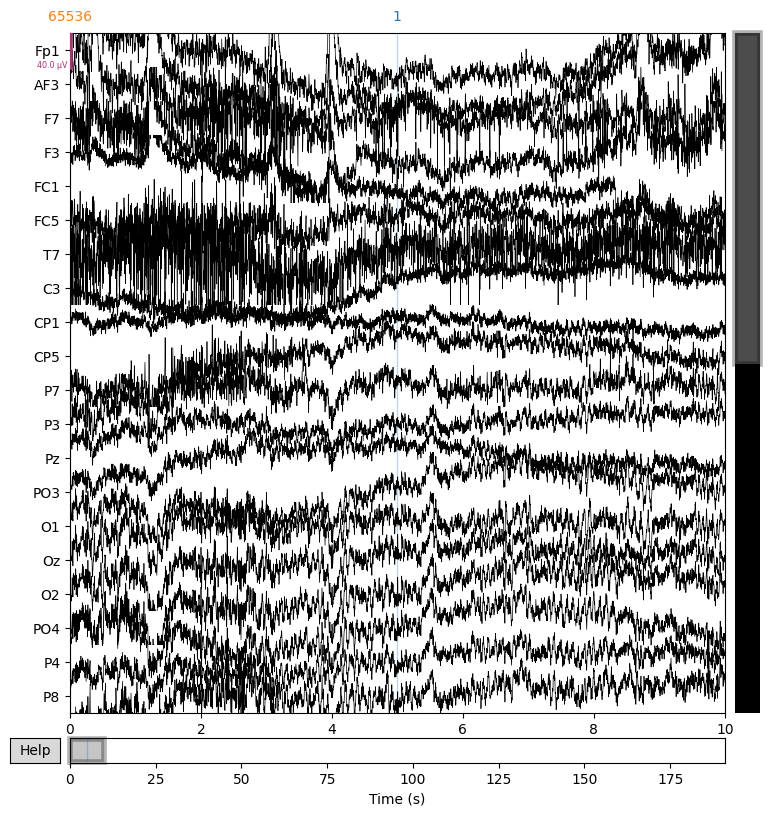

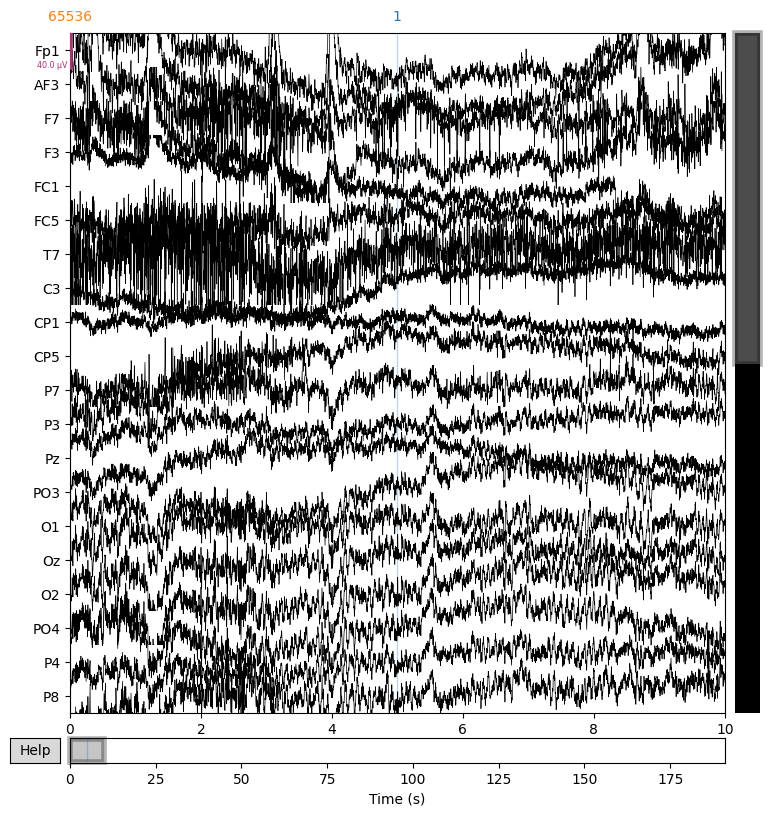

In [18]:
raw_pd.plot()

In [19]:
# We are only interested in the 32-channel EEG data as the responses, so select those channels
resp_channels = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7',
                 'P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2',
                 'C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']

data_pd = load_bids(root=bids_root, subject=subject_pd, datatype='eeg', task='rest', suffix='eeg', session='off', resp_channels=resp_channels)
data_hc = load_bids(root=bids_root, subject=subject_hc, datatype='eeg', task='rest', suffix='eeg', session='hc', resp_channels=resp_channels)

Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_events.tsv.
Reading channel info from /Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


/opt/anaconda3/envs/conda_mne/lib/python3.11/site-packages/naplib/io/load_bids.py:94: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: f
MMSE: 30
NAART: 42
disease_duration: 8
rl_deficits: L OFF meds, more R ON meds
notes: Used preprocessed data from EEGLAB .mat file instead of raw data for pd on
  raw = read_raw_bids(bids_path=bids_path)
100%|██████████| 2/2 [00:00<00:00, 25.83it/s]

Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_events.tsv.
Reading channel info from /Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).



/opt/anaconda3/envs/conda_mne/lib/python3.11/site-packages/naplib/io/load_bids.py:94: RuntimeWarning: Unable to map the following column(s) to to MNE:
gender: f
MMSE: 26
NAART: 48
disease_duration: n/a
rl_deficits: n/a
notes: n/a
  raw = read_raw_bids(bids_path=bids_path)
100%|██████████| 2/2 [00:00<00:00, 22.71it/s]


In [20]:
data_pd.mne_info

<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 experimenter: mne_anonymize
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 104.0 Hz
 meas_date: 2011-02-18 10:07:18 UTC
 nchan: 32
 projs: []
 sfreq: 512.0 Hz
 subject_info: 3 items (dict)
>

In [21]:
data_pd[0]

{'event_index': 0,
 'description': '65536',
 'stim': array([[6.5536e+04],
        [6.5536e+04],
        [6.5536e+04],
        ...,
        [0.0000e+00],
        [0.0000e+00],
        [1.0000e+00]]),
 'stim_ch_names': ['Status'],
 'resp': array([[ 0.00500388,  0.00073836, -0.00068723, ...,  0.00412316,
          0.0082125 ,  0.00490838],
        [ 0.00500866,  0.00073611, -0.00069192, ...,  0.0041221 ,
          0.00821081,  0.00490738],
        [ 0.00501576,  0.0007387 , -0.0006913 , ...,  0.0041226 ,
          0.00820916,  0.00490494],
        ...,
        [ 0.0049516 ,  0.00069064, -0.00069389, ...,  0.00401407,
          0.00817834,  0.00491629],
        [ 0.00495354,  0.00069808, -0.00071942, ...,  0.00401329,
          0.00817869,  0.00491457],
        [ 0.00494716,  0.00069461, -0.00070064, ...,  0.00400785,
          0.00817428,  0.00490926]]),
 'befaft': [0, 0],
 'sfreq': 512.0,
 'ch_names': ['Fp1',
  'AF3',
  'F7',
  'F3',
  'FC1',
  'FC5',
  'T7',
  'C3',
  'CP1',
  'CP5',
  

## Рассчитаем соотношение альфа и тета ритмов:
Спектральная плотность мощности (PSD, СПМ) в физике и обработке сигналов — функция, описывающая распределение мощности сигнала в зависимости от частоты, то есть мощность, приходящуюся на единичный интервал частоты.

Имеет размерность мощности, делённой на частоту, то есть энергии. Например, в Международной системе единиц (СИ) это Вт/с−1 (Вт·с) или Вт/Гц. 1

Часто термин применяется при описании спектральной мощности потоков электромагнитного излучения или других колебаний в сплошной среде, например, акустических. 1 В этом случае подразумевается мощность на единицу частоты на единицу площади, например: Вт·Гц-1·м-2, часто также Дж·м-2.

Для работы с ритмами мозга MNE python предлагает функцию mne.time_frequency.psd_array_welch. Она реализована в соответствии со статьей Питера Д. Уэлча "Использование быстрого преобразования Фурье для оценки спектров мощности: метод, основанный на усреднении по времени коротких модифицированных периодограмм". Труды IEEE по аудио и электроакустике, 15(2):70-73, 1967.

Вычислим соотношение альфа/Тета в каждом канале. Мы будем использовать логарифмические значения, чтобы коэффициенты выше 1 были положительными, а коэффициенты ниже 1 - отрицательными, что делает полученную "карту" более наглядной.

In [22]:
def log_alpha_theta_ratio(response, sfreq):
    '''response should be of shape (time * channels)'''
    # must transpose response for mne function
    alpha_psd, _ = mne.time_frequency.psd_array_welch(response.T, sfreq, fmin=8, fmax=13, verbose=False) # psd is shape (channels * freqs)
    alpha_psd = alpha_psd.mean(-1)
    
    theta_psd, _ = mne.time_frequency.psd_array_welch(response.T, sfreq, fmin=4, fmax=8, verbose=False) # psd is shape (channels * freqs)
    theta_psd = theta_psd.mean(-1)
    #print(f'{np.mean(np.log(alpha_psd))} {np.mean(np.log(theta_psd))}')
    
    return np.log(alpha_psd / theta_psd)
    

alpha_theta_ratio_pd = [log_alpha_theta_ratio(trial['resp'], trial['sfreq']) for trial in data_pd]
alpha_theta_ratio_hc = [log_alpha_theta_ratio(trial['resp'], trial['sfreq']) for trial in data_hc]

In [24]:
df_pd = pd.DataFrame(alpha_theta_ratio_pd, columns=resp_channels, index=['Parkinson (task1)', 'Parkinson (task2)'])
df_pd.head()

Fp1       AF3        F7        F3       FC1       FC5  \
Parkinson (task1) -2.956091 -2.605477 -1.532497 -1.992585 -0.979684 -0.410979   
Parkinson (task2) -2.312230 -1.803975 -0.641801 -1.113163 -0.459126 -0.309230   

                         T7        C3       CP1       CP5  ...        C4  \
Parkinson (task1) -0.368561 -0.265077 -0.648261 -0.838916  ...  0.450846   
Parkinson (task2) -0.220693 -0.387382  0.209164  0.043153  ...  0.204603   

                         T8       FC6       FC2        F4        F8       AF4  \
Parkinson (task1) -0.111134 -0.305652 -0.414599 -1.810505 -1.664818 -2.619720   
Parkinson (task2)  0.088299 -0.008959 -0.143371 -1.007491 -0.769636 -1.793098   

                        Fp2        Fz        Cz  
Parkinson (task1) -2.810747 -1.821417  0.003271  
Parkinson (task2) -2.209526 -0.891412 -0.197601  

[2 rows x 32 columns]

In [25]:
print(f'Parkinson, task1 mean alpha_theta_ratio: {np.mean(alpha_theta_ratio_pd[0])}')
print(f'Parkinson, task2 mean alpha_theta_ratio: {np.mean(alpha_theta_ratio_pd[1])}')

Parkinson, task1 mean alpha_theta_ratio: -0.8296064946992817
Parkinson, task2 mean alpha_theta_ratio: -0.2541176913128655


In [26]:
df_hc = pd.DataFrame(alpha_theta_ratio_hc, columns=resp_channels, index=['Healthy (task1)', 'Healthy (task2)'])
df_hc.head()

Fp1       AF3        F7        F3       FC1       FC5  \
Healthy (task1) -2.158081 -1.557962 -0.635515 -1.015756 -1.099973 -0.468332   
Healthy (task2) -1.140596 -0.614844 -0.020063 -0.351466 -0.184199  0.099997   

                       T7        C3       CP1       CP5  ...        C4  \
Healthy (task1) -0.263327 -0.471416 -0.368454 -0.166000  ... -0.624862   
Healthy (task2)  0.488001  0.052781  0.176115  0.355984  ...  0.122959   

                       T8       FC6       FC2        F4        F8       AF4  \
Healthy (task1)  0.246523 -0.568634 -0.706732 -1.518856 -0.959792 -2.034258   
Healthy (task2)  0.305460  0.087407 -0.128352 -0.295869 -0.035138 -0.590576   

                      Fp2        Fz        Cz  
Healthy (task1) -2.294857 -1.449469 -0.340760  
Healthy (task2) -1.042259 -0.334008 -0.161981  

[2 rows x 32 columns]

In [27]:
print(f'Healthy, task1 mean alpha_theta_ratio: {np.mean(alpha_theta_ratio_hc[0])}')
print(f'Healthy, task2 mean alpha_theta_ratio: {np.mean(alpha_theta_ratio_hc[1])}')

Healthy, task1 mean alpha_theta_ratio: -0.7072535899807941
Healthy, task2 mean alpha_theta_ratio: -0.028340708202067712


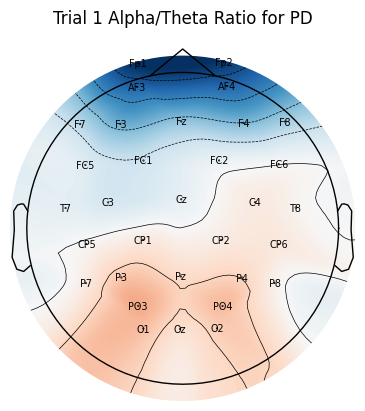

In [28]:
# First, we need to set the montage (i.e. the arrangement of electrodes) so that the channels can be plotted properly
# Here, we set it to the standard 10-20 system, but many options are available if the data were recorded in a different
# montage. See https://mne.tools/dev/generated/mne.channels.make_standard_montage.html for details
data_pd.mne_info.set_montage('standard_1020')

fig, ax = plt.subplots()
ax.set_title('Trial 1 Alpha/Theta Ratio for PD')
plot_topomap(alpha_theta_ratio_pd[1], data_pd.mne_info, axes=ax, sensors=True, names=resp_channels)
plt.show()

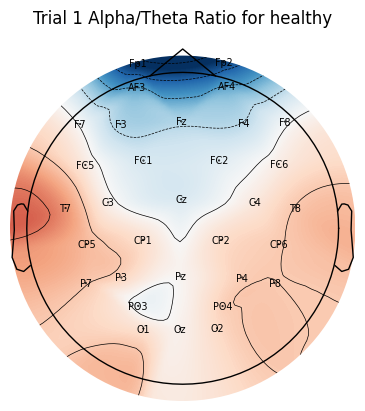

In [29]:
data_hc.mne_info.set_montage('standard_1020')
fig, ax = plt.subplots()
ax.set_title('Trial 1 Alpha/Theta Ratio for healthy')
plot_topomap(alpha_theta_ratio_hc[1], data_hc.mne_info, axes=ax, sensors=True, names=resp_channels)
plt.show()

## Попытка соединить в единый датасет

In [30]:
from autoreject import AutoReject
from autoreject import get_rejection_threshold

subject_hc = 'hc7'

raw_hc = mne.io.read_raw_bdf('/Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf', preload=True)
raw_hc.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4','EXG5', 'EXG6', 'EXG7', 'EXG8',
                                  'Status']) #drop extra channels
raw_hc.set_eeg_reference(ref_channels='average')
raw_hc.filter(0.5, None, fir_design='firwin',phase='zero-double') #remove drifts

epochs_hc = mne.make_fixed_length_epochs(raw_hc, duration=1.0, preload=False, proj=True)
reject = get_rejection_threshold(epochs_hc)
print('The rejection dictionary is %s' % reject)
epochs_hc.drop_bad(reject=reject)

Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 192 events an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


The rejection dictionary is {'eeg': 0.00010340581484039486}
Using data from preloaded Raw for 192 events and 512 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'FC6', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'T8', 'Fp2']
    Rejecting  epoch based 

<Epochs | 154 events (all good), 0 – 0.998 s (baseline off), ~29 kB, data not loaded,
 '1': 154>

Using data from preloaded Raw for 1 events and 512 original time points ...


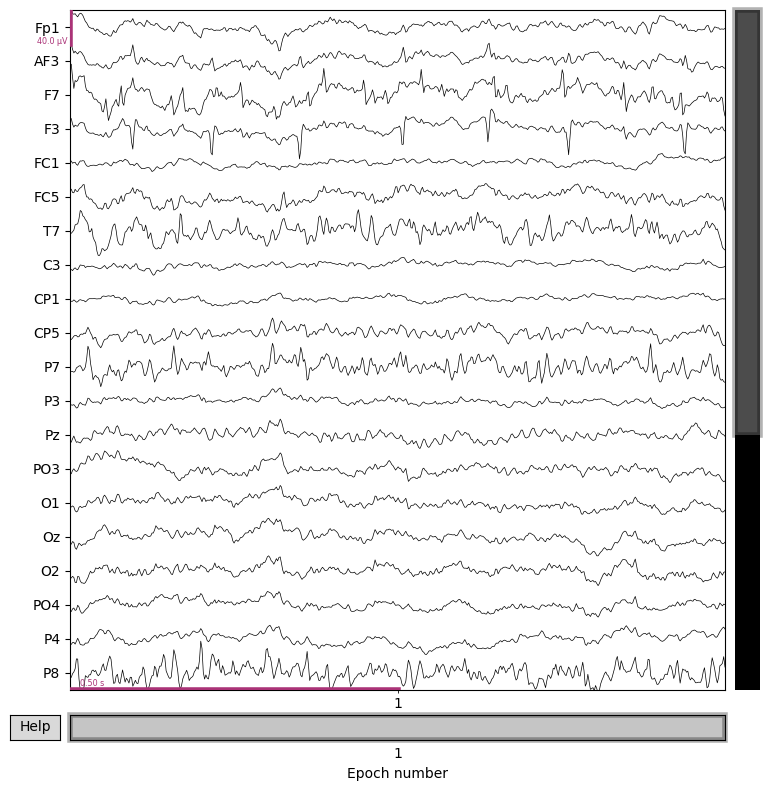

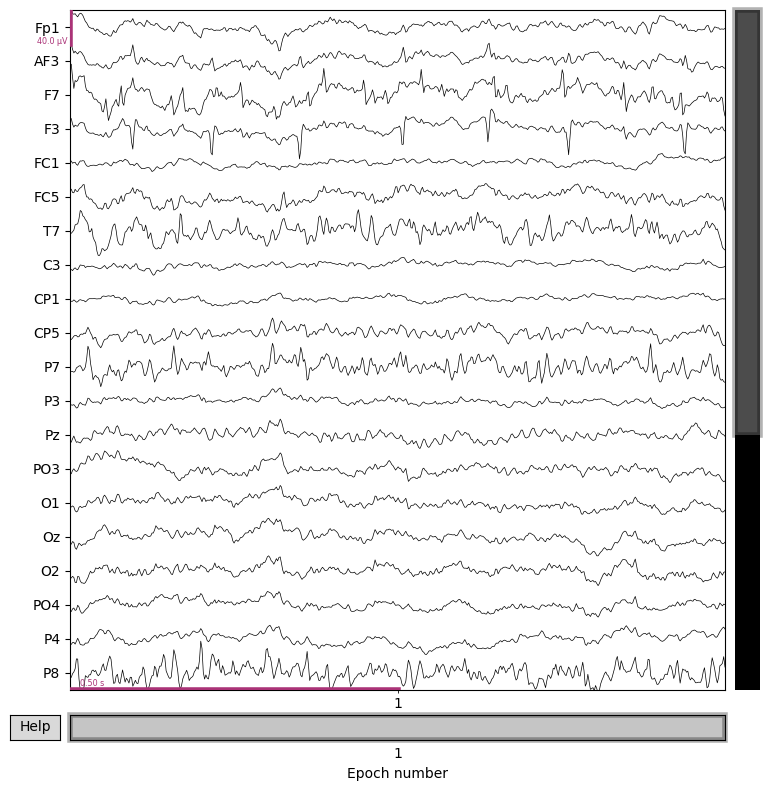

In [31]:
epochs_hc[0].plot()

In [32]:
print(epochs_hc.info)
print(len(epochs_hc))

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: True
 highpass: 0.5 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-02-25 13:25:06 UTC
 nchan: 32
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>
154


In [33]:
raw_pd = mne.io.read_raw_bdf('/Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf', preload=True)
raw_pd.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4','EXG5', 'EXG6', 'EXG7', 'EXG8',
                                  'Status']) #drop extra channels
raw_pd.set_eeg_reference(ref_channels='average')
raw_pd.filter(0.5, None, fir_design='firwin',phase='zero-double') #remove drifts

epochs_pd = mne.make_fixed_length_epochs(raw_pd, duration=1.0, preload=False, proj=True)
reject = get_rejection_threshold(epochs_pd)
print('The rejection dictionary is %s' % reject)
epochs_pd.drop_bad(reject=reject)

Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
191 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 191 events 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


The rejection dictionary is {'eeg': 0.00016489478615330495}
Using data from preloaded Raw for 191 events and 512 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'T8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'FC6']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Fp2']
    Rejecting  ep

<Epochs | 77 events (all good), 0 – 0.998 s (baseline off), ~29 kB, data not loaded,
 '1': 77>

Using data from preloaded Raw for 1 events and 512 original time points ...


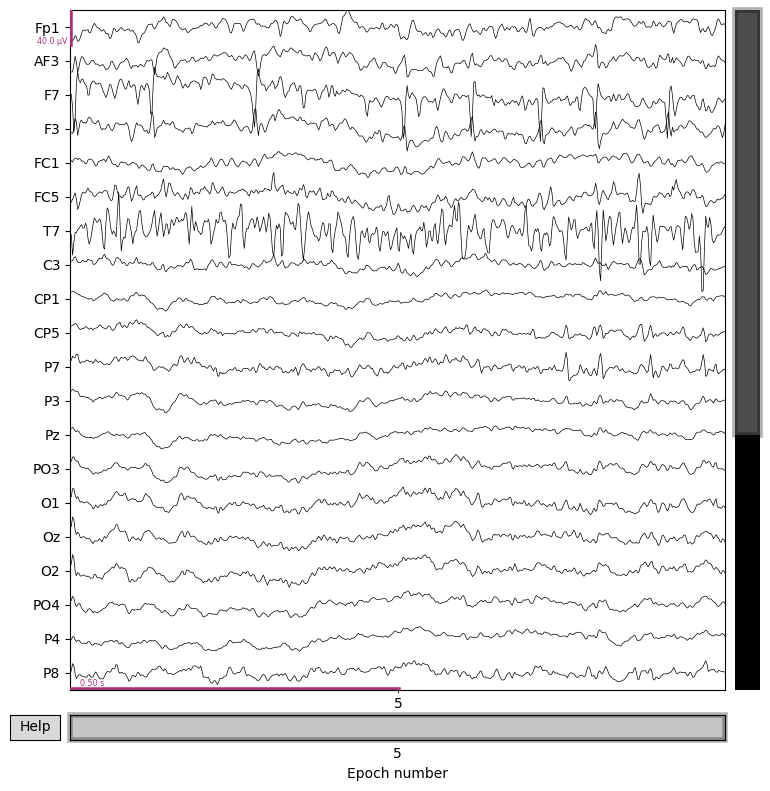

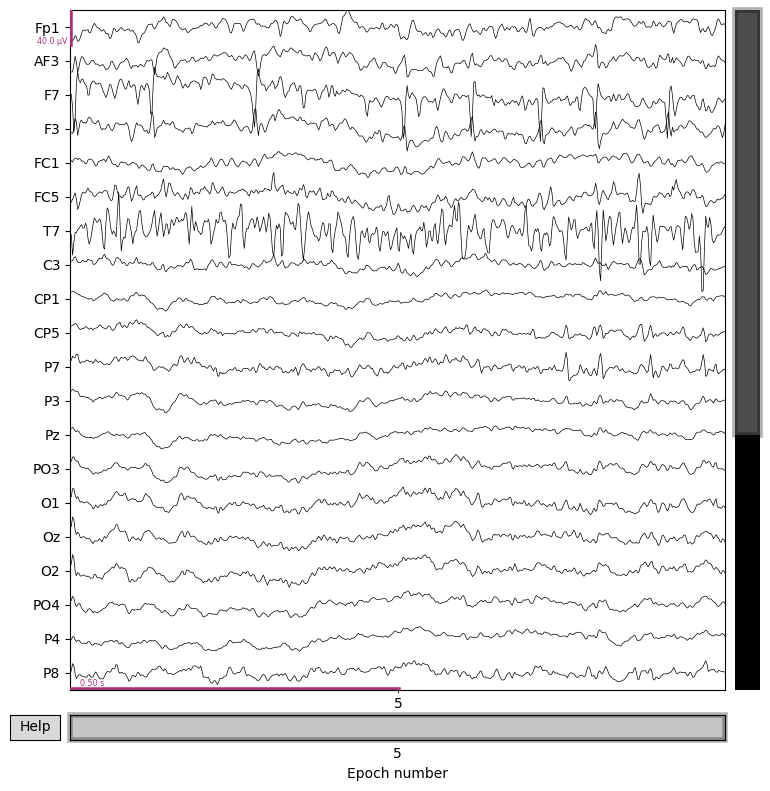

In [34]:
epochs_pd[0].plot()

In [35]:
print(epochs_pd.info)
print(len(epochs_pd))

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: True
 highpass: 0.5 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-02-18 13:07:18 UTC
 nchan: 32
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>
77


Using data from preloaded Raw for 77 events and 512 original time points ...
Not setting metadata
77 matching events found


/opt/anaconda3/envs/conda_mne/lib/python3.11/site-packages/mne/viz/epochs.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  this_fig = figure(layout="constrained")


No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
77 matching events found
No baseline correction applied
0 projection it

/var/folders/vb/ln0by8yd5g188n3xwgtwx5dr0000gn/T/ipykernel_84158/3370171048.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs_pd.plot_image(picks=resp_channels)
/var/folders/vb/ln0by8yd5g188n3xwgtwx5dr0000gn/T/ipykernel_84158/3370171048.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs_pd.plot_image(picks=resp_channels)
/var/folders/vb/ln0by8yd5g188n3xwgtwx5dr0000gn/T/ipykernel_84158/3370171048.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs_pd.plot_image(picks=resp_channels)
/var/folders/vb/ln0by8yd5g188n3xwgtwx5dr0000gn/T/ipykernel_84158/3370171048.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs_pd.plot_image(picks=resp_channe

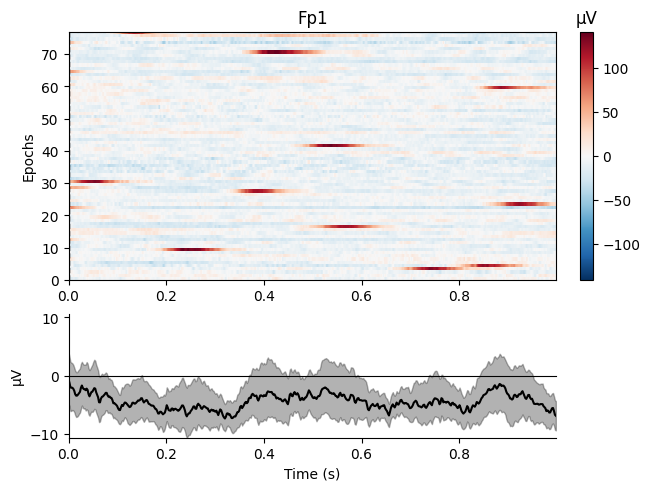

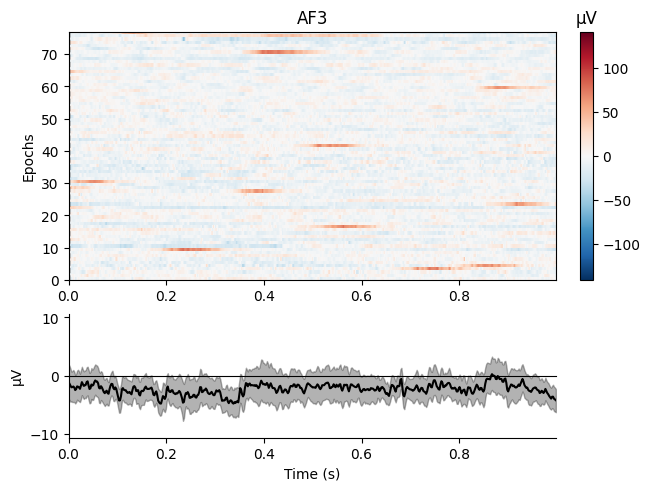

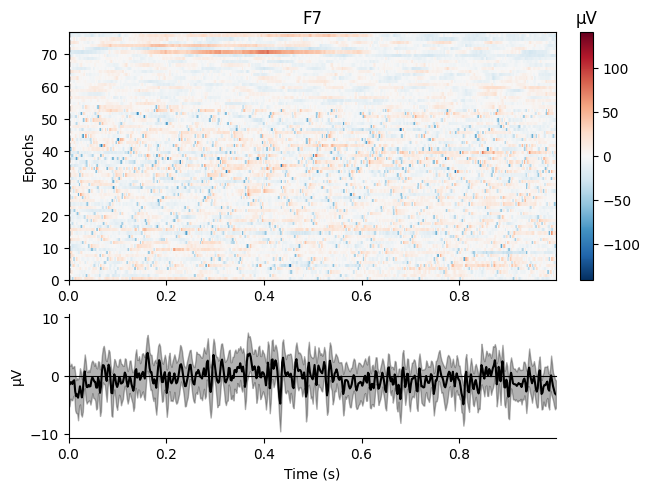

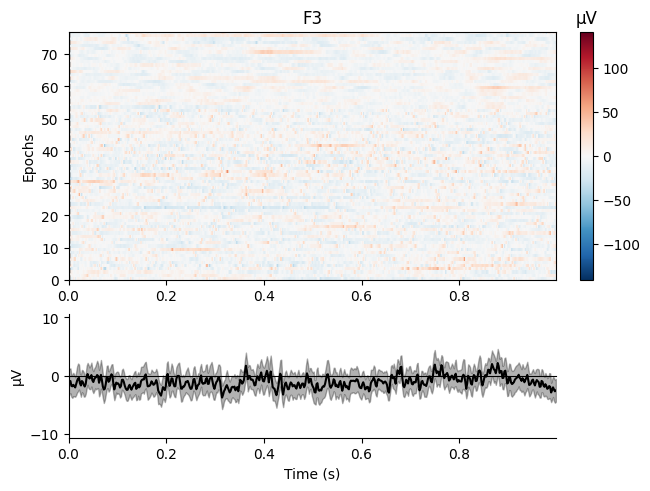

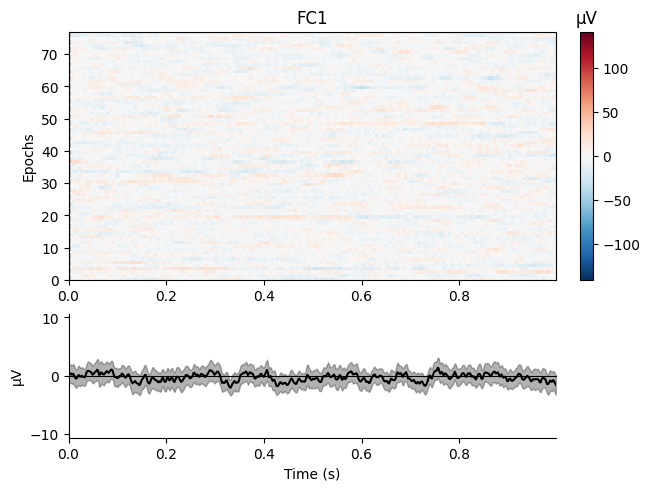

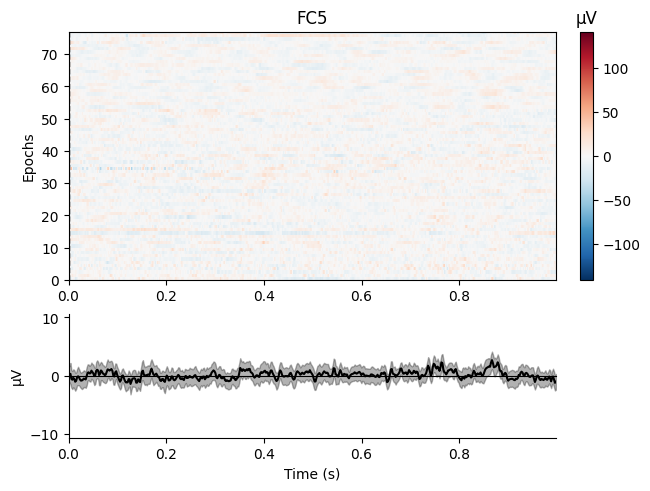

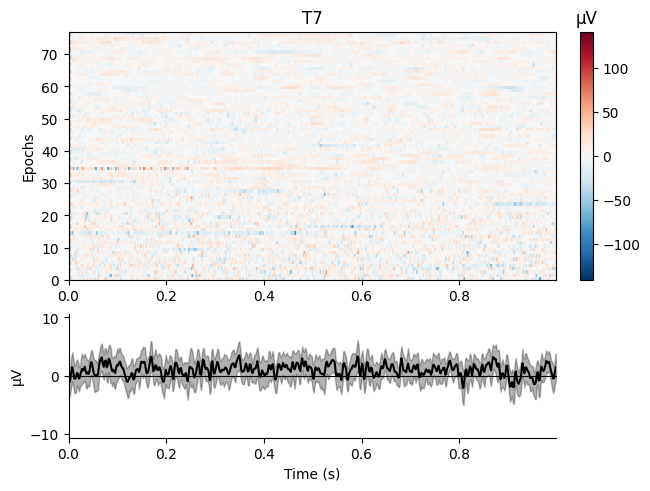

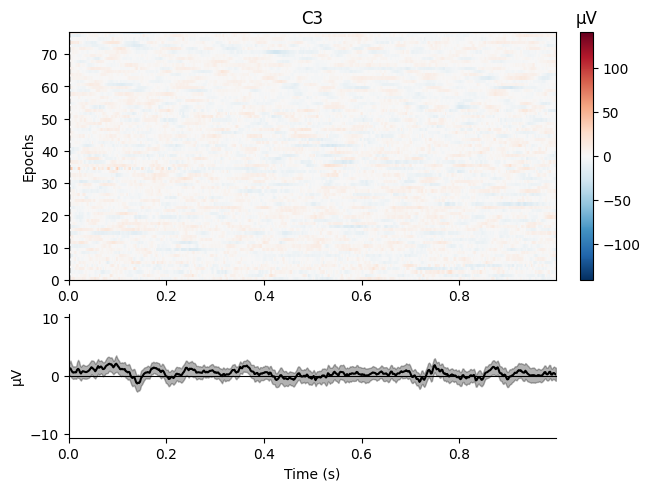

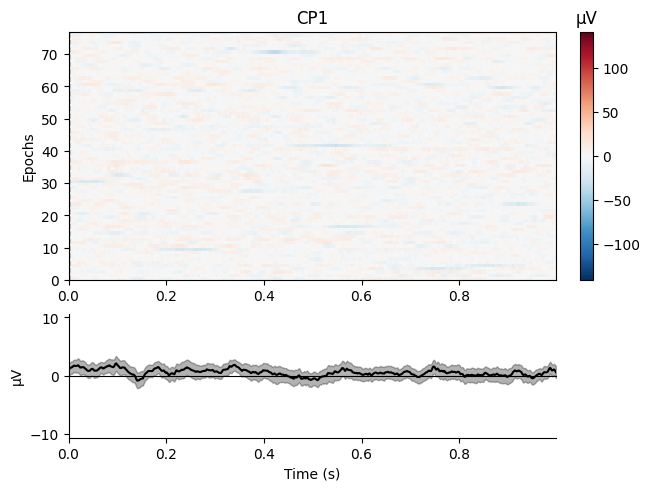

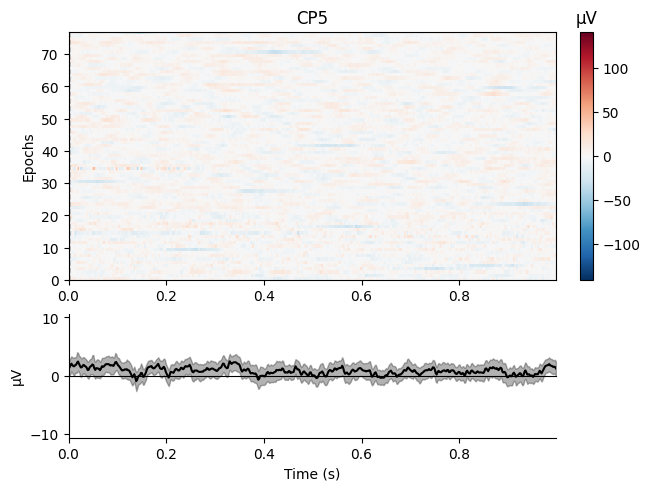

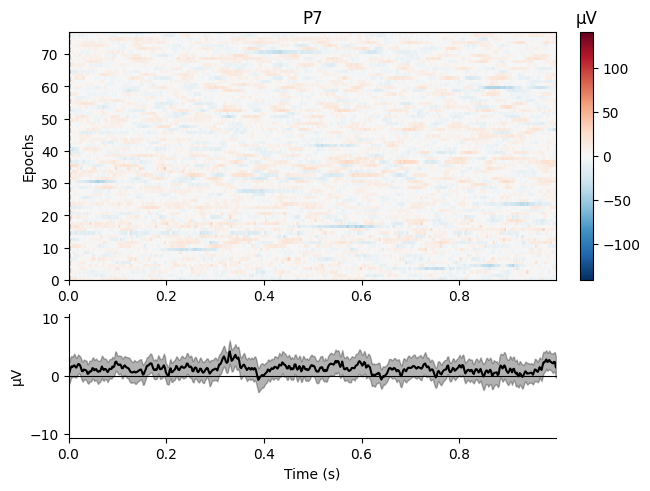

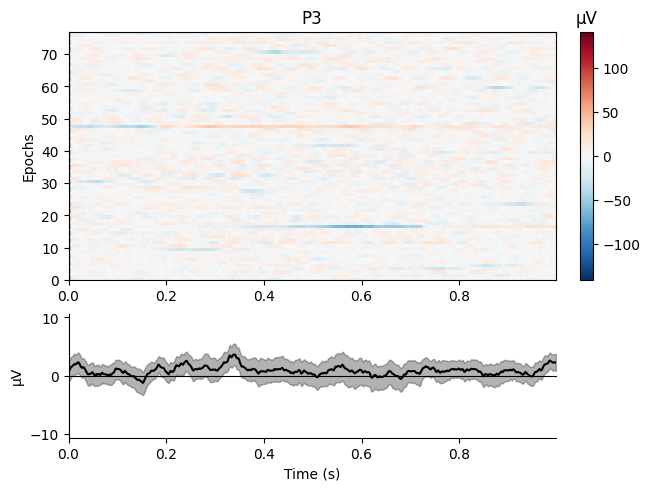

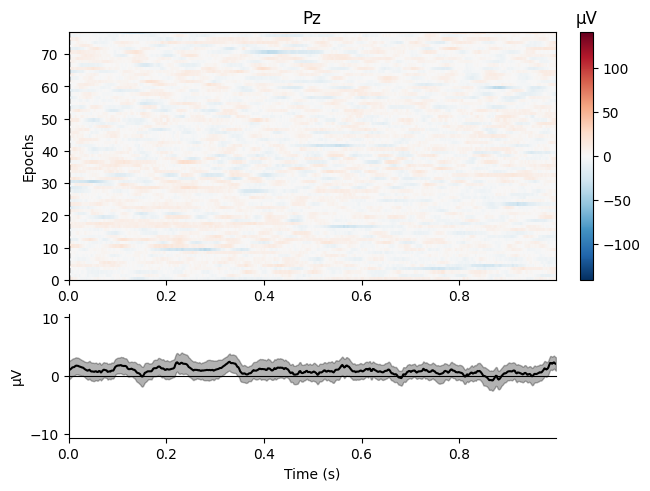

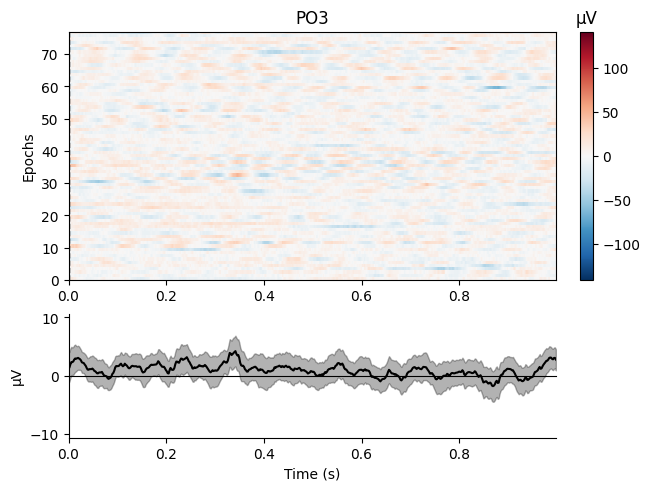

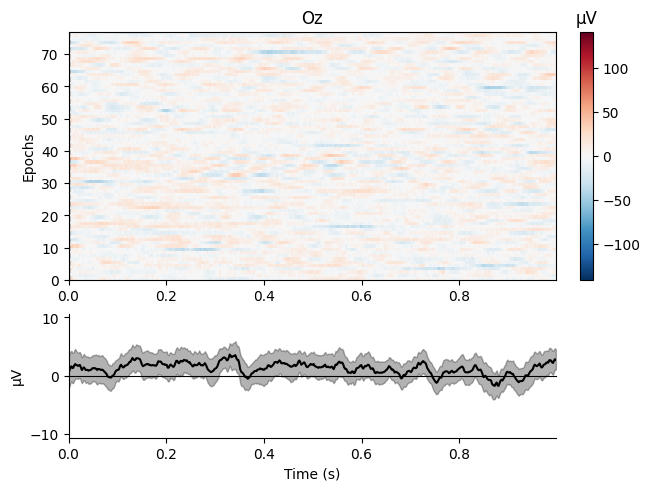

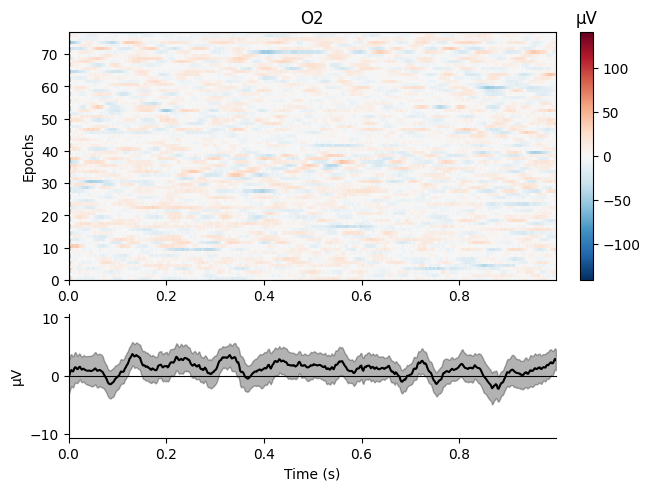

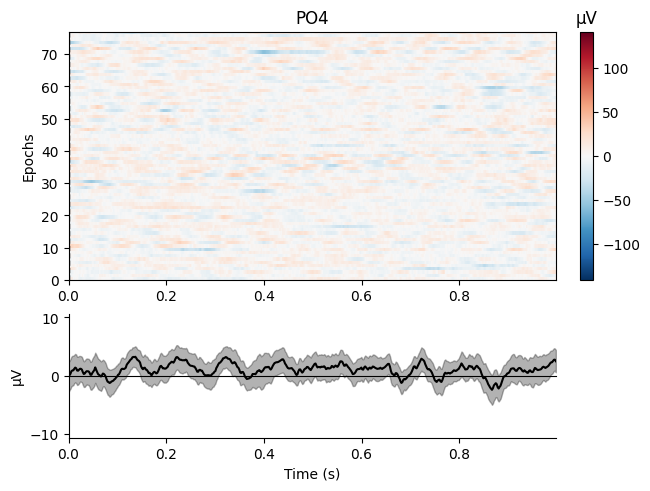

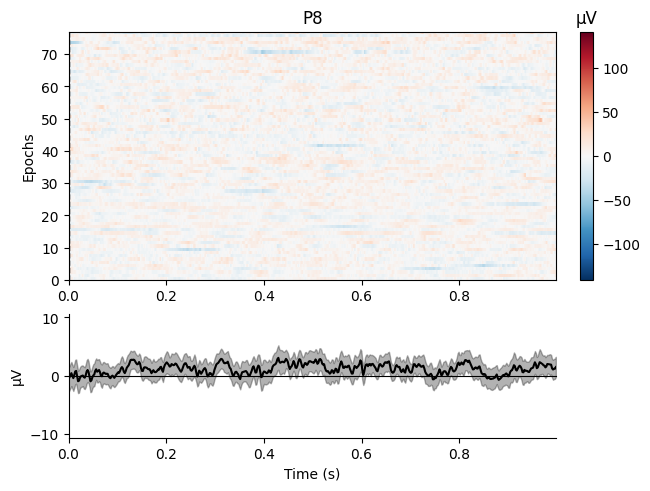

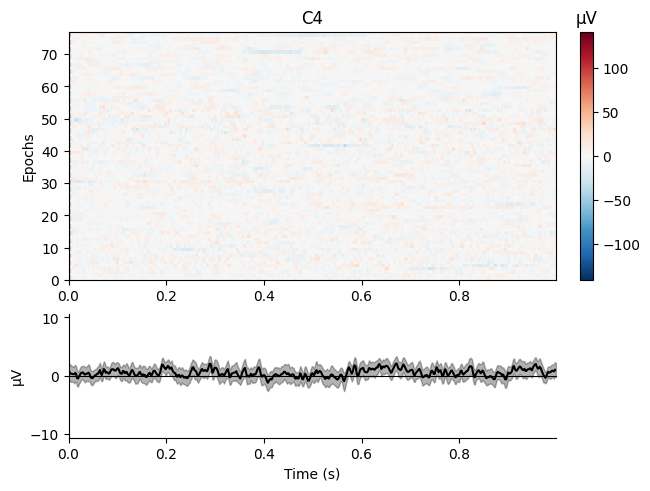

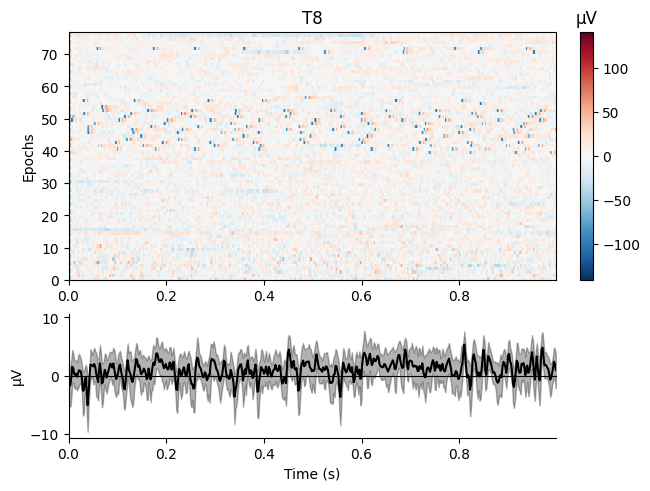

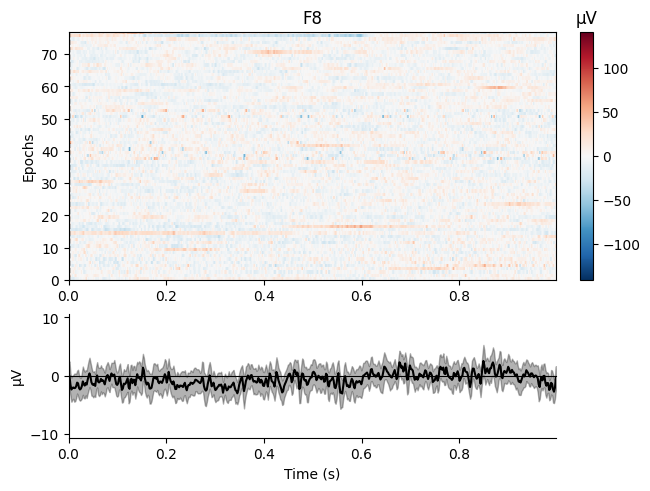

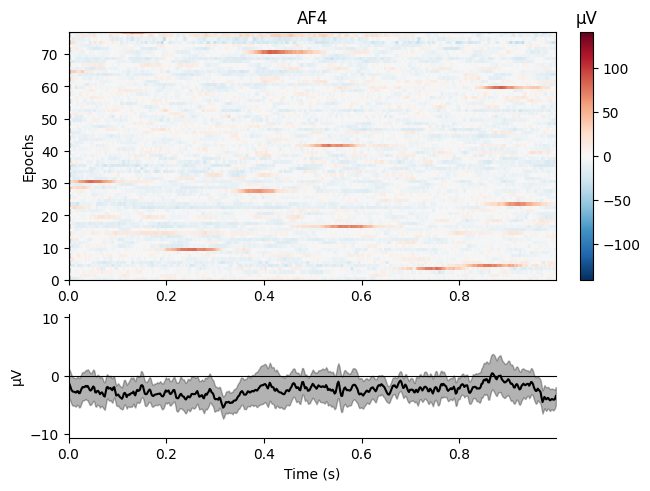

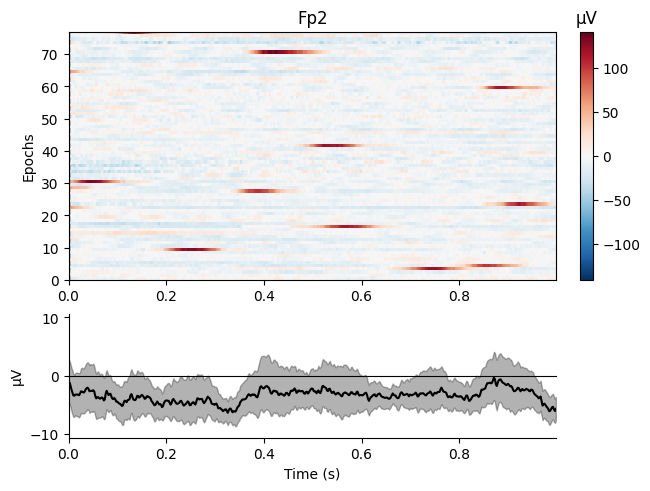

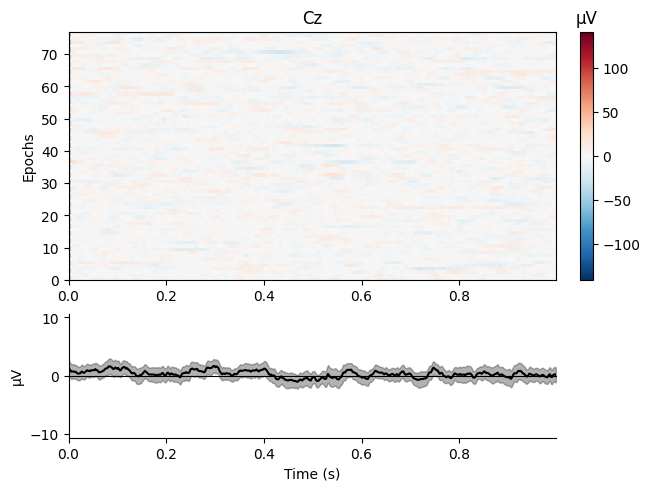

In [36]:
event_related_plot = epochs_pd.plot_image(picks=resp_channels)

In [37]:
#epochs_joined = epochs_hc + epochs_pd
print(epochs_hc.events.size)
print(epochs_pd.events.size)

462
231


In [38]:
epochs_hc.events[0]

array([512,   0,   1])

In [39]:
epochs_pd.events[0]

array([2560,    0,    1])

Для того, чтобы данными было удобнее манипулировать, мне хочется сделать из них не объект класса Epoch, а обычный тензор (точнее, np.array). Для этого у Epoch есть метод get_data - он может принимать некоторые параметры, а может и работать с дефолтными (см. https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.get_data)

In [40]:
pd_data1 = epochs_pd.get_data()
pd_data1.shape

Using data from preloaded Raw for 77 events and 512 original time points ...


(77, 32, 512)

In [41]:
hc_data = epochs_hc.get_data()
hc_data.shape

Using data from preloaded Raw for 154 events and 512 original time points ...


(154, 32, 512)

Эпох для болезни Паркинсона в 2 раза меньше, чем эпох с данными здоровых. Нужно добавить еще 77 эпох

In [ ]:
openneuro.download(dataset=dataset, target_dir=bids_root, include=[f"sub-pd3"])


👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds002778 …


📁 Traversing directories for ds002778 : 20 entities [00:11,  1.78 entities/s]

📥 Retrieving up to 19 files (5 concurrent downloads). 
✅ Finished downloading ds002778.
 
🧠 Please enjoy your brains.
 


In [43]:
raw_pd2 = mne.io.read_raw_bdf('/Users/evakhromeeva/mne_data/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf', preload=True)
raw_pd2.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4','EXG5', 'EXG6', 'EXG7', 'EXG8',
                                  'Status']) #drop extra channels
raw_pd2.set_eeg_reference(ref_channels='average')
raw_pd2.filter(0.5, None, fir_design='firwin',phase='zero-double') #remove drifts

epochs_pd2 = mne.make_fixed_length_epochs(raw_pd2, duration=1.0, preload=False, proj=True)
reject = get_rejection_threshold(epochs_pd2)
print('The rejection dictionary is %s' % reject)
epochs_pd2.drop_bad(reject=reject)

Extracting EDF parameters from /Users/evakhromeeva/mne_data/ds002778/sub-pd3/ses-off/eeg/sub-pd3_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


The rejection dictionary is {'eeg': 0.00013482398702397048}
Using data from preloaded Raw for 200 events and 512 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP5', 'CP6', 'C4', 'T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP5', 'F8']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : 

<Epochs | 121 events (all good), 0 – 0.998 s (baseline off), ~29 kB, data not loaded,
 '1': 121>

In [44]:
pd_data2 = epochs_pd2.get_data()
pd_data2.shape

Using data from preloaded Raw for 121 events and 512 original time points ...


(121, 32, 512)

In [45]:
# Собираем тестовые данные, объединяя загруженные данные здоровых людей и с Паркинсоном (0 - нет болезни, 1 - есть):
X_train = np.zeros((77 + 121 + 154, 32, 512))
y_train = np.zeros((77 + 121 + 154))
for i in range(77):
    X_train[i] = pd_data1[i]
    y_train[i] = 1
for i in range(121):
    X_train[77 + i] = pd_data2[i]
    y_train[77 + i] = 1
for i in range(154):
    X_train[77 + 121 + i] = hc_data[i]
    y_train[77 + 121 + i] = 0


print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)

(352, 32, 512)
float64
(352,)
float64


# Пробуем понижать размерность

In [46]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn import datasets
from sklearn.manifold import TSNE, MDS

import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [47]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 5) # предложим разделить на 5 кластеров - по 5 типам волн (альфа, бета, гамма, дельта и тета)
cluster = kmeans.fit_predict(X_train[0])

### t-SNE

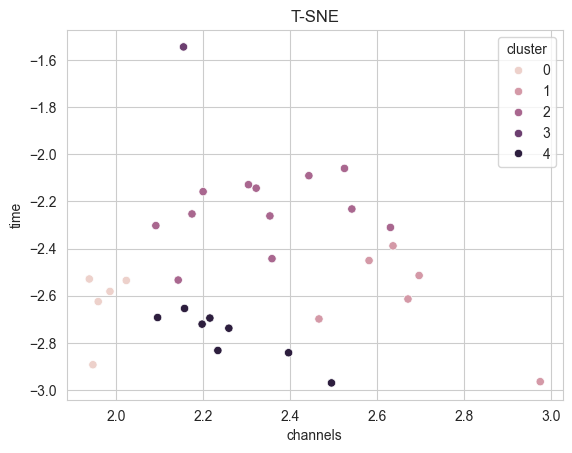

In [48]:
tsne2D = TSNE(n_components=2)
tsne_data2D = tsne2D.fit_transform(X_train[1]) # epoch 0
tsne2D_df = pd.DataFrame(data =  tsne_data2D, columns = ['channels', 'time'])

tsne2D_df['cluster'] = cluster

sns.scatterplot(x='channels', y='time', hue='cluster', data=tsne2D_df)
plt.title("T-SNE")
plt.show()

## MDS

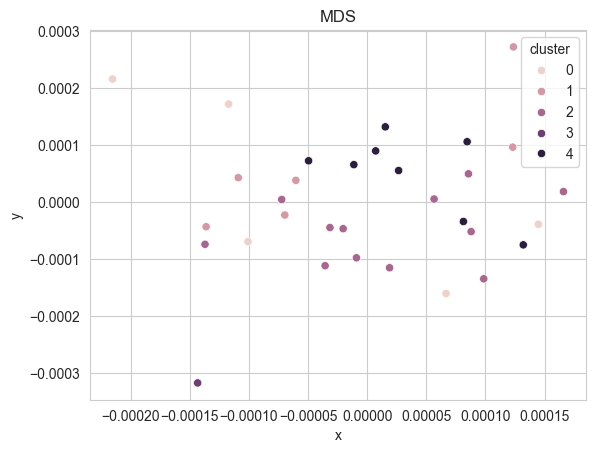

In [49]:
mds2D = MDS(n_components=2)

mds_data2D = mds2D.fit_transform(X_train[0])
mds2D_df = pd.DataFrame(data =  mds_data2D, columns = ['x', 'y'])

mds2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=mds2D_df)
plt.title("MDS")
plt.show()

## PCA

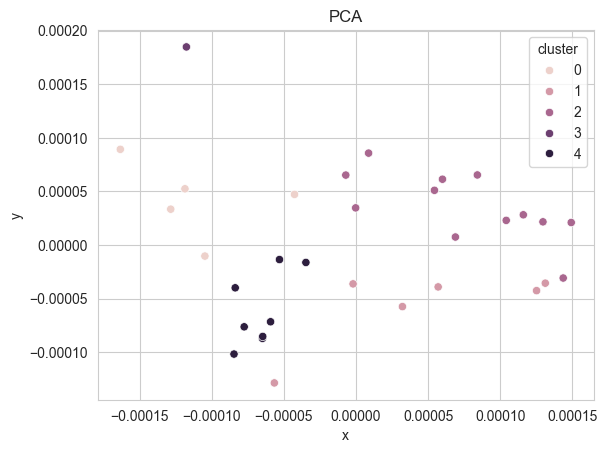

In [50]:
pca2D = PCA(n_components=2)
#dimensions
pca_2D = pca2D.fit_transform(X_train[0])
pca2D_df = pd.DataFrame(data = pca_2D, columns = ['x', 'y'])

pca2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=pca2D_df)
plt.title("PCA")
plt.show()

## ICA

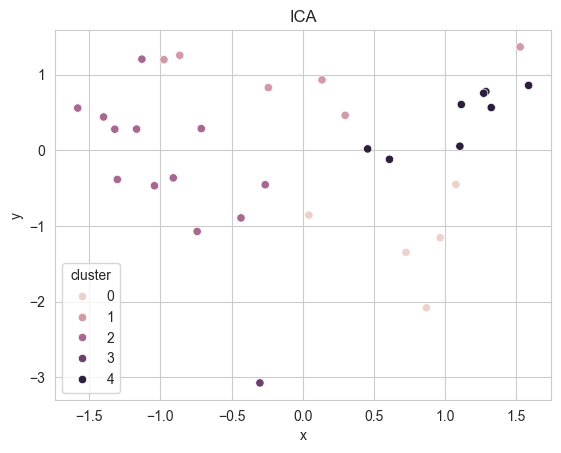

In [51]:
ica2D = FastICA(n_components=2)
ica_data2D = ica2D.fit_transform(X_train[0])
ica2D_df = pd.DataFrame(data =  ica_data2D,columns = ['x', 'y'])

ica2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=ica2D_df)
plt.title("ICA")
plt.show()

## truncated SVD

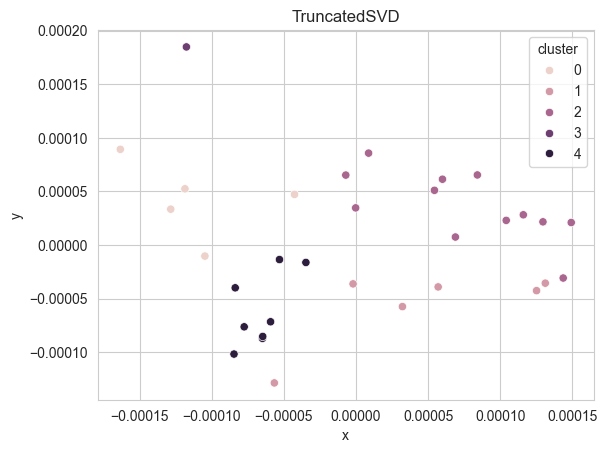

In [52]:
tsvd2D = TruncatedSVD(n_components=2)
tsvd_data2D = tsvd2D.fit_transform(X_train[0])
tsvd2D_df = pd.DataFrame(data =  tsvd_data2D, columns = ['x', 'y'])

tsvd2D_df['cluster']  = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=tsvd2D_df)
plt.title("TruncatedSVD")
plt.show()

## Pipeline

In [53]:
import torch
from torch import tensor
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [54]:
class Dataset(BaseDataset):
    CLASSES = ['healthy', 'parkinson']
    def __init__(
                self,
                X,
                y,
                classes=None,
                preprocessing=None,
        ):
            self.len = len(X[:,0,0])
            # convert str names to class values
            self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
            self.X = X
            self.y = y
            self.preprocessing = preprocessing

    def __getitem__(self, i):
        item = tensor(self.X[i], dtype=torch.double)
        result = tensor(self.y[i], dtype=torch.double)

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(item=X[i])
            X[i] = sample

        #print(item.dtype)
        #print(result.dtype)
        return item, result

    def __len__(self):
        return self.len


In [55]:
# Lets look at data we have
CLASSES = ['healthy', 'parkinson']

train_dataset = Dataset(X_train, y_train, classes=CLASSES)

item, result = train_dataset[4] # get some sample
print(f'X_train[4] shape = {item.shape}, y_train[4] = {result}')
print(f'X_train[4] dtype = {item.dtype}, y_train[4] dtype = {result.dtype}')

X_train[4] shape = torch.Size([32, 512]), y_train[4] = 1.0
X_train[4] dtype = torch.float64, y_train[4] dtype = torch.float64


In [56]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' #'mps'
print(DEVICE)

cpu


In [77]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32 * 512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )
        self.double()
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork().to(DEVICE)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16384, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [66]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.001 ) # momentum=0.9

In [82]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [78]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [79]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

In [80]:
print(train_dataset)

In [81]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    #test(train_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
pred: torch.Size([32, 1]), y: torch.Size([32]) 
loss: 0.450699  [    0/  352]
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 


/opt/anaconda3/envs/conda_mne/lib/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
Epoch 2
-------------------------------
pred: torch.Size([32, 1]), y: torch.Size([32]) 
loss: 0.600803  [    0/  352]
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
pred: torch.Size([32, 1]), y: torch.Size([32]) 
Epoch 3
----------